In [1]:
import pandas as pd
import csv
from google.colab import drive
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/gdrive')
url='/gdrive/My Drive/kemanan cerda/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data=pd.read_csv(url)

Mounted at /gdrive


In [2]:
x1=data.loc[data[' Label'] == 'DDoS']
x=x1.drop(' Label', axis=1)

In [3]:
x=np.nan_to_num(x,nan=0 , posinf=33333333, neginf=33333333) #mengganti yang /0 atau positif infinit  atau negatif infinit 
xscaler = StandardScaler().fit_transform(x)
xscaler

array([[-0.00458991, -0.50501581, -0.77586672, ..., -0.3176639 ,
        -0.52243831, -0.41554631],
       [-0.00458991, -0.40416646, -0.24894064, ..., -0.3176639 ,
        -0.52243831, -0.41554631],
       [-0.00458991, -0.51179547, -0.77586672, ..., -0.3176639 ,
        -0.52243831, -0.41554631],
       ...,
       [-0.00458991, -0.54159226, -0.24894064, ..., -0.3176639 ,
        -0.52243831, -0.41554631],
       [-0.00458991, -0.54668737, -0.77586672, ..., -0.3176639 ,
        -0.52243831, -0.41554631],
       [-0.00458991, -0.54173498, -0.24894064, ..., -0.3176639 ,
        -0.52243831, -0.41554631]])

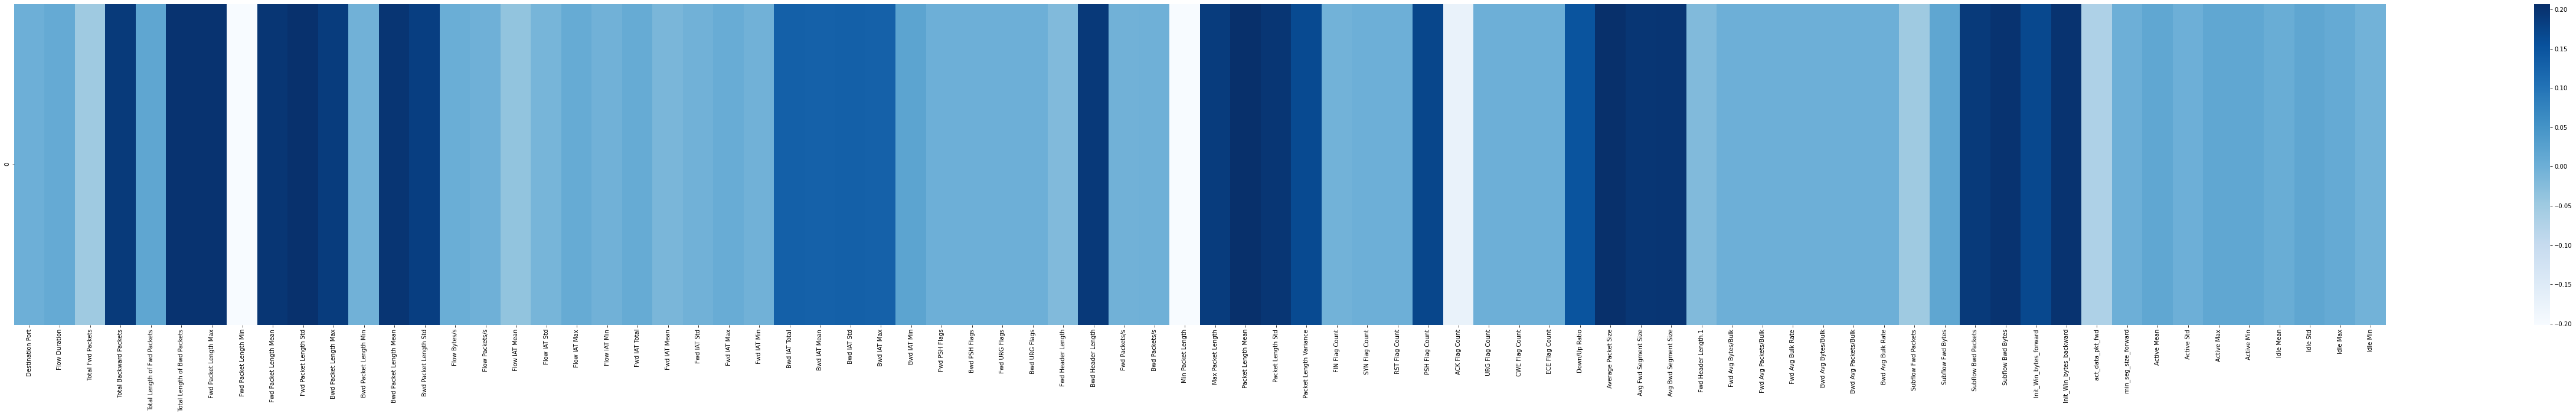

In [4]:
pca= PCA(n_components=1)
principalComponents_data = pca.fit_transform(xscaler)
df_comp = pd.DataFrame(pca.components_,columns=[' Destination Port',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',	' Fwd Packet Length Min',' Fwd Packet Length Mean',	' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std','Flow Bytes/s',' Flow Packets/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min','Fwd IAT Total',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',	' Fwd IAT Min','Bwd IAT Total',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min','Fwd PSH Flags', ' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Length',' Bwd Header Length','Fwd Packets/s',	' Bwd Packets/s',' Min Packet Length', ' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance','FIN Flag Count',' SYN Flag Count', ' RST Flag Count',' PSH Flag Count', ' ACK Flag Count',' URG Flag Count',' CWE Flag Count',' ECE Flag Count',' Down/Up Ratio',	' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size',	' Fwd Header Length.1','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Subflow Fwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Packets',' Subflow Bwd Bytes', 'Init_Win_bytes_forward',' Init_Win_bytes_backward',' act_data_pkt_fwd',' min_seg_size_forward','Active Mean',' Active Std',' Active Max',' Active Min','Idle Mean',' Idle Std',' Idle Max',	' Idle Min' ])
plt.figure(figsize=(90,10))
sns.heatmap(df_comp,cmap="Blues")

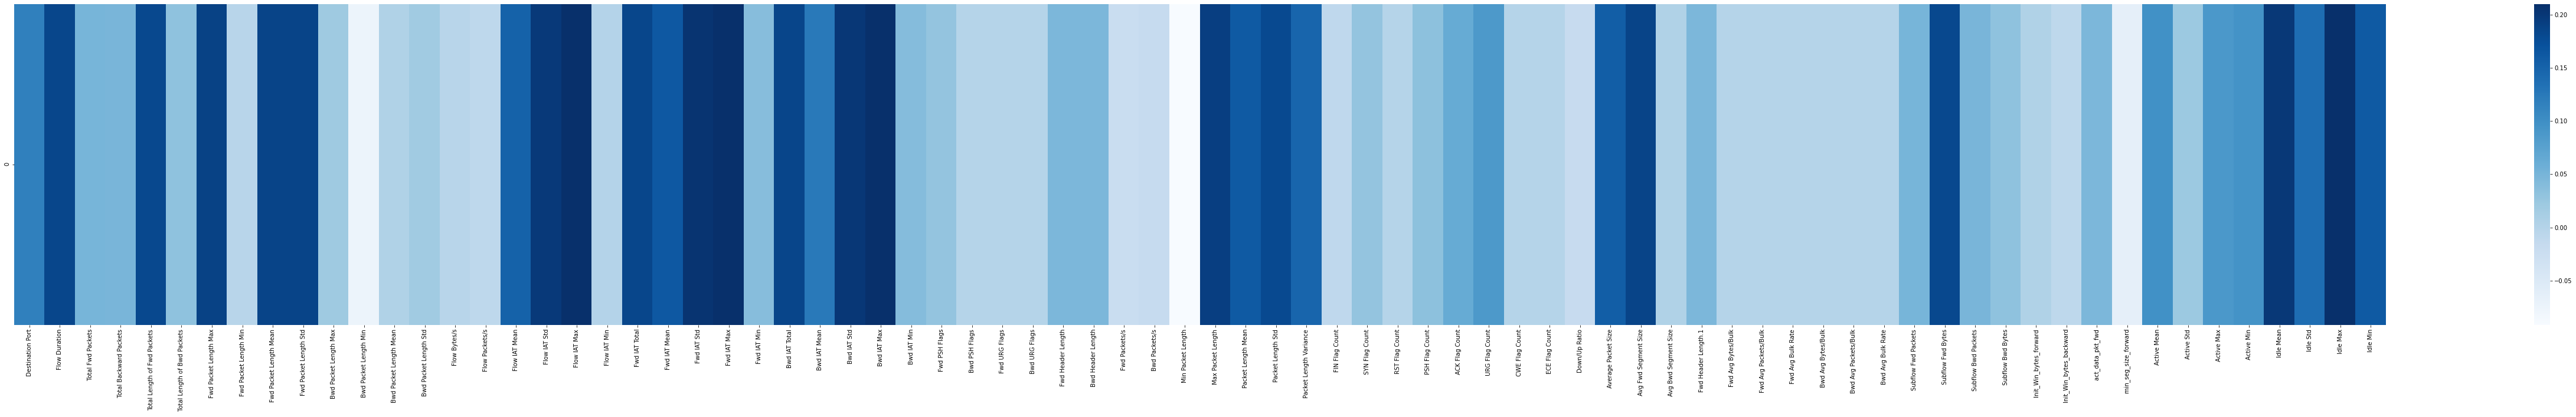

In [5]:
y1=data.loc[data[' Label'] == 'BENIGN']
y=y1.drop(' Label', axis=1)
y=np.nan_to_num(y,nan=0 , posinf=33333333, neginf=33333333)
yscaler = StandardScaler().fit_transform(y)
principalComponents_data1 = pca.fit_transform(yscaler)
df_comp1 = pd.DataFrame(pca.components_,columns=[' Destination Port',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',	' Fwd Packet Length Min',' Fwd Packet Length Mean',	' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std','Flow Bytes/s',' Flow Packets/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min','Fwd IAT Total',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',	' Fwd IAT Min','Bwd IAT Total',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min','Fwd PSH Flags', ' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Length',' Bwd Header Length','Fwd Packets/s',	' Bwd Packets/s',' Min Packet Length', ' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance','FIN Flag Count',' SYN Flag Count', ' RST Flag Count',' PSH Flag Count', ' ACK Flag Count',' URG Flag Count',' CWE Flag Count',' ECE Flag Count',' Down/Up Ratio',	' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size',	' Fwd Header Length.1','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Subflow Fwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Packets',' Subflow Bwd Bytes', 'Init_Win_bytes_forward',' Init_Win_bytes_backward',' act_data_pkt_fwd',' min_seg_size_forward','Active Mean',' Active Std',' Active Max',' Active Min','Idle Mean',' Idle Std',' Idle Max',	' Idle Min' ])
plt.figure(figsize=(90,10))
sns.heatmap(df_comp1,cmap="Blues")

In [6]:
data2=data[[' Total Backward Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',' Fwd Packet Length Mean',' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Mean',' Bwd Header Length',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance',' PSH Flag Count',' Average Packet Size',' Avg Fwd Segment Size',' Label']]
datados=data2.loc[data2[' Label'] == 'DDoS']
databen=data2.loc[data2[' Label'] == 'BENIGN']
data2

,Total Backward Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Header Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,PSH Flag Count,Average Packet Size,Avg Fwd Segment Size,Label
0,0,0,6,6.0,0.0,0,0.0,0,6,6.0,0.0,0.0,0,9.0,6.0,BENIGN
1,1,6,6,6.0,0.0,6,6.0,20,6,6.0,0.0,0.0,0,9.0,6.0,BENIGN
2,1,6,6,6.0,0.0,6,6.0,20,6,6.0,0.0,0.0,0,9.0,6.0,BENIGN
3,1,6,6,6.0,0.0,6,6.0,20,6,6.0,0.0,0.0,0,9.0,6.0,BENIGN
4,0,0,6,6.0,0.0,0,0.0,0,6,6.0,0.0,0.0,0,9.0,6.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,1,6,6,6.0,0.0,6,6.0,20,6,6.0,0.0,0.0,0,9.0,6.0,BENIGN
225741,1,6,6,6.0,0.0,6,6.0,20,6,6.0,0.0,0.0,0,9.0,6.0,BENIGN
225742,1,6,6,6.0,0.0,6,6.0,20,6,6.0,0.0,0.0,0,9.0,6.0,BENIGN
225743,0,0,6,6.0,0.0,0,0.0,0,6,6.0,0.0,0.0,0,9.0,6.0,BENIGN


In [7]:
#mean
meanA1=datados[' Total Backward Packets'].mean()
meanA2=datados[' Total Length of Bwd Packets'].mean()
meanA3=datados[' Fwd Packet Length Max'].mean()
meanA4=datados[' Fwd Packet Length Mean'].mean()
meanA5=datados[' Fwd Packet Length Std'].mean()
meanA6=datados['Bwd Packet Length Max'].mean()
meanA7=datados[' Bwd Packet Length Mean'].mean()
meanA8=datados[' Bwd Header Length'].mean()
meanA9=datados[' Max Packet Length'].mean()
meanA10=datados[' Packet Length Mean'].mean()
meanA11=datados[' Packet Length Std'].mean()
meanA12=datados[' Packet Length Variance'].mean()
meanA13=datados[' PSH Flag Count'].mean()
meanA14=datados[' Average Packet Size'].mean()
meanA15=datados[' Avg Fwd Segment Size'].mean()
meanB1=databen[' Total Backward Packets'].mean()
meanB2=databen[' Total Length of Bwd Packets'].mean()
meanB3=databen[' Fwd Packet Length Max'].mean()
meanB4=databen[' Fwd Packet Length Mean'].mean()
meanB5=databen[' Fwd Packet Length Std'].mean()
meanB6=databen['Bwd Packet Length Max'].mean()
meanB7=databen[' Bwd Packet Length Mean'].mean()
meanB8=databen[' Bwd Header Length'].mean()
meanB9=databen[' Max Packet Length'].mean()
meanB10=databen[' Packet Length Mean'].mean()
meanB11=databen[' Packet Length Std'].mean()
meanB12=databen[' Packet Length Variance'].mean()
meanB13=databen[' PSH Flag Count'].mean()
meanB14=databen[' Average Packet Size'].mean()
meanB15=databen[' Avg Fwd Segment Size'].mean()

In [8]:
#std
stdA1=datados[' Total Backward Packets'].std()
stdA2=datados[' Total Length of Bwd Packets'].std()
stdA3=datados[' Fwd Packet Length Max'].std()
stdA4=datados[' Fwd Packet Length Mean'].std()
stdA5=datados[' Fwd Packet Length Std'].std()
stdA6=datados['Bwd Packet Length Max'].std()
stdA7=datados[' Bwd Packet Length Mean'].std()
stdA8=datados[' Bwd Header Length'].std()
stdA9=datados[' Max Packet Length'].std()
stdA10=datados[' Packet Length Mean'].std()
stdA11=datados[' Packet Length Std'].std()
stdA12=datados[' Packet Length Variance'].std()
stdA13=datados[' PSH Flag Count'].std()
stdA14=datados[' Average Packet Size'].std()
stdA15=datados[' Avg Fwd Segment Size'].std()
stdB1=databen[' Total Backward Packets'].std()
stdB2=databen[' Total Length of Bwd Packets'].std()
stdB3=databen[' Fwd Packet Length Max'].std()
stdB4=databen[' Fwd Packet Length Mean'].std()
stdB5=databen[' Fwd Packet Length Std'].std()
stdB6=databen['Bwd Packet Length Max'].std()
stdB7=databen[' Bwd Packet Length Mean'].std()
stdB8=databen[' Bwd Header Length'].std()
stdB9=databen[' Max Packet Length'].std()
stdB10=databen[' Packet Length Mean'].std()
stdB11=databen[' Packet Length Std'].std()
stdB12=databen[' Packet Length Variance'].std()
stdB13=databen[' PSH Flag Count'].std()
stdB14=databen[' Average Packet Size'].std()
stdB15=databen[' Avg Fwd Segment Size'].std()

In [9]:
#var
varA1=datados[' Total Backward Packets'].var()
varA2=datados[' Total Length of Bwd Packets'].var()
varA3=datados[' Fwd Packet Length Max'].var()
varA4=datados[' Fwd Packet Length Mean'].var()
varA5=datados[' Fwd Packet Length Std'].var()
varA6=datados['Bwd Packet Length Max'].var()
varA7=datados[' Bwd Packet Length Mean'].var()
varA8=datados[' Bwd Header Length'].var()
varA9=datados[' Max Packet Length'].var()
varA10=datados[' Packet Length Mean'].var()
varA11=datados[' Packet Length Std'].var()
varA12=datados[' Packet Length Variance'].var()
varA13=datados[' PSH Flag Count'].var()
varA14=datados[' Average Packet Size'].var()
varA15=datados[' Avg Fwd Segment Size'].var()
varB1=databen[' Total Backward Packets'].var()
varB2=databen[' Total Length of Bwd Packets'].var()
varB3=databen[' Fwd Packet Length Max'].var()
varB4=databen[' Fwd Packet Length Mean'].var()
varB5=databen[' Fwd Packet Length Std'].var()
varB6=databen['Bwd Packet Length Max'].var()
varB7=databen[' Bwd Packet Length Mean'].var()
varB8=databen[' Bwd Header Length'].var()
varB9=databen[' Max Packet Length'].var()
varB10=databen[' Packet Length Mean'].var()
varB11=databen[' Packet Length Std'].var()
varB12=databen[' Packet Length Variance'].var()
varB13=databen[' PSH Flag Count'].var()
varB14=databen[' Average Packet Size'].var()
varB15=databen[' Avg Fwd Segment Size'].var()

In [10]:
#min
minA1=datados[' Total Backward Packets'].min()
minA2=datados[' Total Length of Bwd Packets'].min()
minA3=datados[' Fwd Packet Length Max'].min()
minA4=datados[' Fwd Packet Length Mean'].min()
minA5=datados[' Fwd Packet Length Std'].min()
minA6=datados['Bwd Packet Length Max'].min()
minA7=datados[' Bwd Packet Length Mean'].min()
minA8=datados[' Bwd Header Length'].min()
minA9=datados[' Max Packet Length'].min()
minA10=datados[' Packet Length Mean'].min()
minA11=datados[' Packet Length Std'].min()
minA12=datados[' Packet Length Variance'].min()
minA13=datados[' PSH Flag Count'].min()
minA14=datados[' Average Packet Size'].min()
minA15=datados[' Avg Fwd Segment Size'].min()
minB1=databen[' Total Backward Packets'].min()
minB2=databen[' Total Length of Bwd Packets'].min()
minB3=databen[' Fwd Packet Length Max'].min()
minB4=databen[' Fwd Packet Length Mean'].min()
minB5=databen[' Fwd Packet Length Std'].min()
minB6=databen['Bwd Packet Length Max'].min()
minB7=databen[' Bwd Packet Length Mean'].min()
minB8=databen[' Bwd Header Length'].min()
minB9=databen[' Max Packet Length'].min()
minB10=databen[' Packet Length Mean'].min()
minB11=databen[' Packet Length Std'].min()
minB12=databen[' Packet Length Variance'].min()
minB13=databen[' PSH Flag Count'].min()
minB14=databen[' Average Packet Size'].min()
minB15=databen[' Avg Fwd Segment Size'].min()

In [11]:
#max
maxA1=datados[' Total Backward Packets'].max()
maxA2=datados[' Total Length of Bwd Packets'].max()
maxA3=datados[' Fwd Packet Length Max'].max()
maxA4=datados[' Fwd Packet Length Mean'].max()
maxA5=datados[' Fwd Packet Length Std'].max()
maxA6=datados['Bwd Packet Length Max'].max()
maxA7=datados[' Bwd Packet Length Mean'].max()
maxA8=datados[' Bwd Header Length'].max()
maxA9=datados[' Max Packet Length'].max()
maxA10=datados[' Packet Length Mean'].max()
maxA11=datados[' Packet Length Std'].max()
maxA12=datados[' Packet Length Variance'].max()
maxA13=datados[' PSH Flag Count'].max()
maxA14=datados[' Average Packet Size'].max()
maxA15=datados[' Avg Fwd Segment Size'].max()
maxB1=databen[' Total Backward Packets'].max()
maxB2=databen[' Total Length of Bwd Packets'].max()
maxB3=databen[' Fwd Packet Length Max'].max()
maxB4=databen[' Fwd Packet Length Mean'].max()
maxB5=databen[' Fwd Packet Length Std'].max()
maxB6=databen['Bwd Packet Length Max'].max()
maxB7=databen[' Bwd Packet Length Mean'].max()
maxB8=databen[' Bwd Header Length'].max()
maxB9=databen[' Max Packet Length'].max()
maxB10=databen[' Packet Length Mean'].max()
maxB11=databen[' Packet Length Std'].max()
maxB12=databen[' Packet Length Variance'].max()
maxB13=databen[' PSH Flag Count'].max()
maxB14=databen[' Average Packet Size'].max()
maxB15=databen[' Avg Fwd Segment Size'].max()

In [12]:
meandos = [meanA1,meanA2, meanA3, meanA4,meanA5,meanA6,meanA7,meanA8,meanA9,meanA10,meanA11,meanA12,meanA13,meanA14,meanA15]
meanben= [meanB1,meanB2, meanB3, meanB4,meanB5,meanB6,meanB7,meanB8,meanB9,meanB10,meanB11,meanB12,meanB13,meanB14,meanB15]
maxdos = [maxA1,maxA2, maxA3, maxA4,maxA5,maxA6,maxA7,maxA8,maxA9,maxA10,maxA11,maxA12,maxA13,maxA14,maxA15]
maxben= [maxB1,maxB2, maxB3, maxB4,maxB5,maxB6,maxB7,maxB8,maxB9,maxB10,maxB11,maxB12,maxB13,maxB14,maxB15]
mindos = [minA1,minA2, minA3, minA4,minA5,minA6,minA7,minA8,minA9,minA10,minA11,minA12,minA13,minA14,minA15]
minben= [minB1,minB2, minB3, minB4,minB5,minB6,minB7,minB8,minB9,minB10,minB11,minB12,minB13,minB14,minB15]
vardos= [varA1,varA2, varA3, varA4,varA5,varA6,varA7,varA8,varA9,varA10,varA11,varA12,varA13,varA14,varA15]
varben= [varB1,varB2, varB3, varB4,varB5,varB6,varB7,varB8,varB9,varB10,varB11,varB12,varB13,varB14,varB15]
stdben= [stdB1,stdB2, stdB3, stdB4,stdB5,stdB6,stdB7,stdB8,stdB9,stdB10,stdB11,stdB12,stdB13,stdB14,stdB15]
stddos= [stdA1,stdA2, stdA3, stdA4,stdA5,stdA6,stdA7,stdA8,stdA9,stdA10,stdA11,stdA12,stdA13,stdA14,stdA15]

In [13]:
#fisher ratioTotal Backward Packets
frtbp1=(meanA1-meanB1)**2
frtbp=frtbp1/df_comp[' Total Backward Packets']-df_comp1[' Total Backward Packets']
#fisher ratio Total Length of Bwd Packets
frtlb1=(meanA2-meanB2)**2
frtlb=frtlb1/df_comp[' Total Length of Bwd Packets']-df_comp1[' Total Length of Bwd Packets']
#fisher ratio Fwd Packet Length Max
frfplmx1=(meanA3-meanB3)**2
frfplmx=frfplmx1/df_comp[' Fwd Packet Length Max']-df_comp1[' Fwd Packet Length Max']
#fisher ratio Fwd Packet Length Max
frfplm1=(meanA4-meanB4)**2
frfplm=frfplm1/df_comp[' Fwd Packet Length Mean']-df_comp1[' Fwd Packet Length Mean']
#fisher ratio Fwd Packet Length Std
frpls1=(meanA5-meanB5)**2
frpls=frpls1/df_comp[' Fwd Packet Length Std']-df_comp1[' Fwd Packet Length Std']
#fisher ratio Bwd Packet Length Max
frbplmx1=(meanA6-meanB6)**2
frbplmx=frbplmx1/df_comp['Bwd Packet Length Max']-df_comp1['Bwd Packet Length Max']
#fisher ratio Bwd Packet Length Mean
frbplm1=(meanA7-meanB7)**2
frbplm=frbplm1/df_comp[' Bwd Packet Length Mean']-df_comp1[' Bwd Packet Length Mean']
#fisher ratio Bwd Header Length
frbhl1=(meanA8-meanB8)**2
frbhl=frbhl1/df_comp[' Bwd Header Length']-df_comp1[' Bwd Header Length']
#fisher ratio Max Packet Length
frmpl1=(meanA9-meanB9)**2
frmpl=frmpl1/df_comp[' Max Packet Length']-df_comp1[' Max Packet Length']
#fisher ratio Packet Length Mean
frplm1=(meanA10-meanB10)**2
frplm=frplm1/df_comp[' Packet Length Mean']-df_comp1[' Packet Length Mean']
#fisher ratio Packet Length Std
frpls1=(meanA11-meanB11)**2
frpls=frpls1/df_comp[' Packet Length Std']-df_comp1[' Packet Length Std']
#fisher ratio Packet Length Variance
frplv1=(meanA12-meanB12)**2
frplv=frplv1/df_comp[' Packet Length Variance']-df_comp1[' Packet Length Variance']
#fisher ratio PSH Flag Count
frpvc1=(meanA13-meanB13)**2
frpvc=frpvc1/df_comp[' PSH Flag Count']-df_comp1[' PSH Flag Count']
#fisher ratio Average Packet Size
fraps1=(meanA14-meanB14)**2
fraps=fraps1/df_comp[' Average Packet Size']-df_comp1[' Average Packet Size']
#fisher ratio Avg Fwd Segment Size
frafss1=(meanA15-meanB15)**2
frafss=frafss1/df_comp[' Avg Fwd Segment Size']-df_comp1[' Avg Fwd Segment Size']

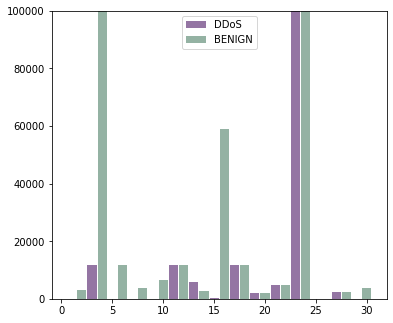

In [14]:
# plot max
# Create bars
barWidth = 0.9
r1=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
r2=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
# ddos plot
plt.bar(r1, maxdos, width = barWidth, color = (0.3,0.1,0.4,0.6), label='DDoS')
#benign plot
plt.bar(r2, maxben, width = barWidth, color = (0.3,0.5,0.4,0.6), label='BENIGN')
# Create legend
plt.legend()
plt.ylim(0,100000)
# Adjust the margins
plt.subplots_adjust(bottom= 4, top = 5) 
# Show graphic
plt.show()

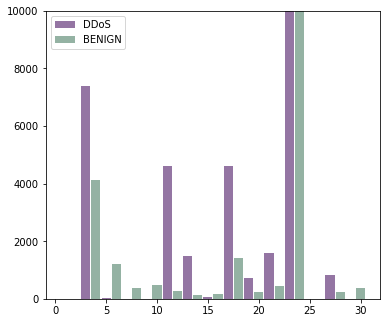

In [15]:
# plot mean
# Create bars
barWidth = 0.9
r1=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
r2=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
# ddos plot
plt.bar(r1, meandos, width = barWidth, color = (0.3,0.1,0.4,0.6), label='DDoS')
#benign plot
plt.bar(r2, meanben, width = barWidth, color = (0.3,0.5,0.4,0.6), label='BENIGN')
# Create legend
plt.legend()
plt.ylim(0,10000)
# Adjust the margins
plt.subplots_adjust(bottom= 4, top = 5) 
# Show graphic
plt.show()

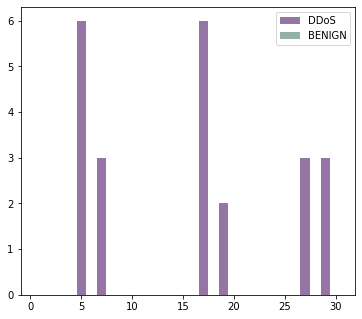

In [16]:
# plot min
# Create bars
barWidth = 0.9
r1=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
r2=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
# ddos plot
plt.bar(r1, mindos, width = barWidth, color = (0.3,0.1,0.4,0.6), label='DDoS')
#benign plot
plt.bar(r2, minben, width = barWidth, color = (0.3,0.5,0.4,0.6), label='BENIGN')
# Create legend
plt.legend()
#plt.ylim(0,1)
# Adjust the margins
plt.subplots_adjust(bottom= 4, top = 5) 
# Show graphic
plt.show()

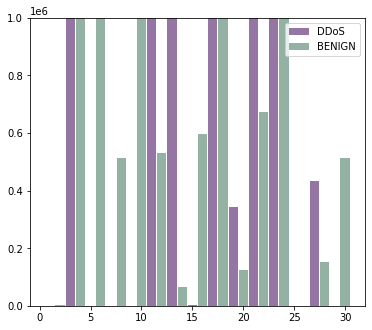

In [17]:
# plot var
# Create bars
barWidth = 0.9
r1=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
r2=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
# ddos plot
plt.bar(r1, vardos, width = barWidth, color = (0.3,0.1,0.4,0.6), label='DDoS')
#benign plot
plt.bar(r2, varben, width = barWidth, color = (0.3,0.5,0.4,0.6), label='BENIGN')
# Create legend
plt.legend()
plt.ylim(0,1000000)
# Adjust the margins
plt.subplots_adjust(bottom= 4, top = 5) 
# Show graphic
plt.show()

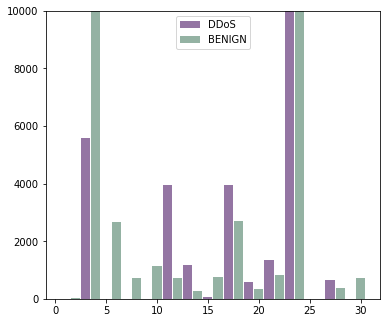

In [18]:
# plot std
# Create bars
barWidth = 0.9
r1=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
r2=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
# ddos plot
plt.bar(r1, stddos, width = barWidth, color = (0.3,0.1,0.4,0.6), label='DDoS')
#benign plot
plt.bar(r2, stdben, width = barWidth, color = (0.3,0.5,0.4,0.6), label='BENIGN')
# Create legend
plt.legend()
plt.ylim(0,10000)
# Adjust the margins
plt.subplots_adjust(bottom= 4, top = 5) 
# Show graphic
plt.show()

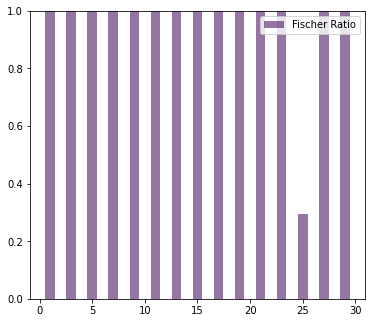

In [19]:
fr= [frtbp[0],frtlb[0],frfplmx[0],frfplm[0],frpls[0],frbplmx[0],frbplm[0],frbhl[0],frmpl[0],frplm[0],frpls[0],frplv[0],frpvc[0],fraps[0],frafss[0]]
# plot std
# Create bars
barWidth = 0.9
r1=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]
# ddos plot
plt.bar(r1, fr, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Fischer Ratio')
# Create legend
plt.legend()
plt.ylim(0,1)
# Adjust the margins
plt.subplots_adjust(bottom= 4, top = 5) 
# Show graphic
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
y = data2[' Label'].map({'BENIGN':0, 'DDoS':1})
x=data2.drop(' Label', axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

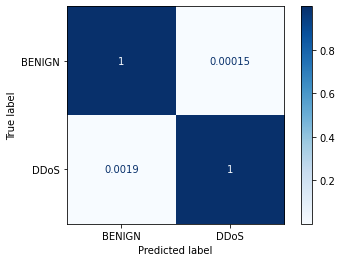

In [21]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['BENIGN',
                                                          'DDoS'],
                     normalize='true', cmap='Blues');


In [35]:
print("KNN Training Accuracy: ", knn.score(X_train, y_train))

KNN Training Accuracy:  0.9991694168198632


Confusion matrix, without normalization
[[19447     3]
 [   50 25649]]
Normalized confusion matrix
[[9.99845758e-01 1.54241645e-04]
 [1.94560100e-03 9.98054399e-01]]


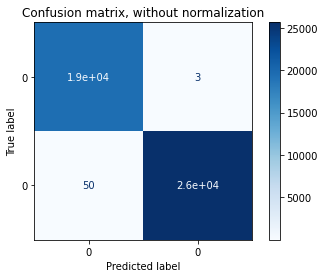

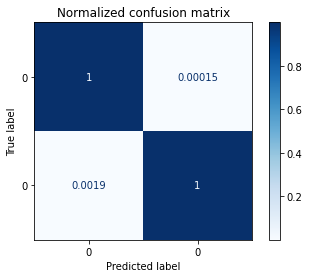

In [36]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,display_labels=y,cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()